In [1]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(20, 16))

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

## Porównanie metod

In [2]:
def read_all_files(path):
    all_files = glob.glob(os.path.join('.', path + "/*.txt"))
    li = []

    for filename in all_files:
        print(filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    return li

In [3]:
col_blue_names = ['remainingTanksBlue', 'remainingRidersBlue', 'remainingSoldiersBlue']
col_red_names = ['remainingTanksRed', 'remainingRidersRed', 'remainingSoldiersRed']

././data/2blue-vs-1red/ModelOutput.2019.lis.17.20_36_20.txt
././data/2blue-vs-1red/ModelOutput.2019.lis.17.20_36_12.txt
././data/2blue-vs-1red/ModelOutput.2019.lis.17.20_36_25.txt
././data/2blue-vs-1red/ModelOutput.2019.lis.17.20_35_48.txt
././data/2blue-vs-1red/ModelOutput.2019.lis.17.20_36_04.txt
././data/0blue-vs-1red/ModelOutput.2019.lis.17.20_30_32.txt
././data/0blue-vs-1red/ModelOutput.2019.lis.17.20_30_55.txt
././data/0blue-vs-1red/ModelOutput.2019.lis.17.20_31_03.txt
././data/0blue-vs-1red/ModelOutput.2019.lis.17.20_30_45.txt
././data/0blue-vs-1red/ModelOutput.2019.lis.17.20_30_20.txt
././data/2blue-0red/ModelOutput.2019.lis.17.20_38_15.txt
././data/2blue-0red/ModelOutput.2019.lis.17.20_38_52.txt
././data/2blue-0red/ModelOutput.2019.lis.17.20_38_44.txt
././data/2blue-0red/ModelOutput.2019.lis.17.20_39_14.txt
././data/2blue-0red/ModelOutput.2019.lis.17.20_38_33.txt


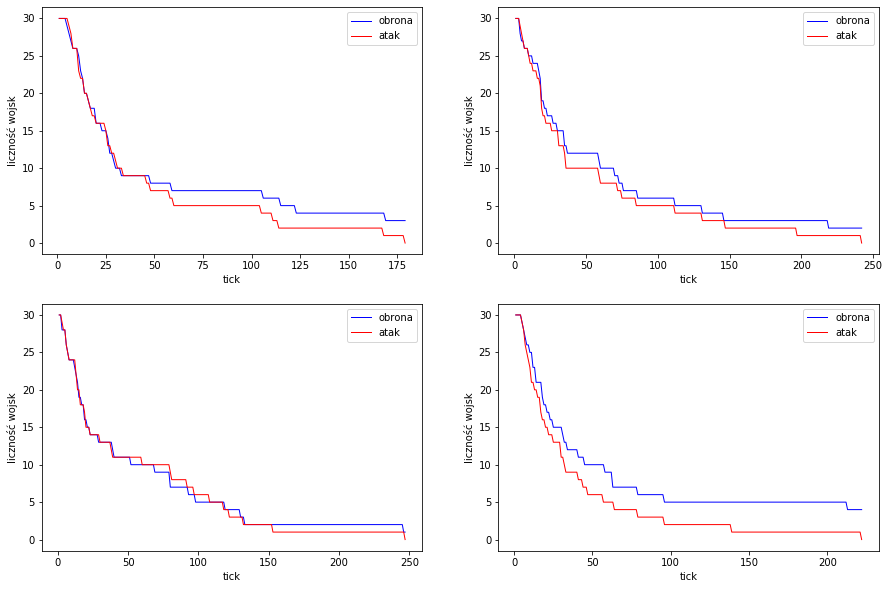

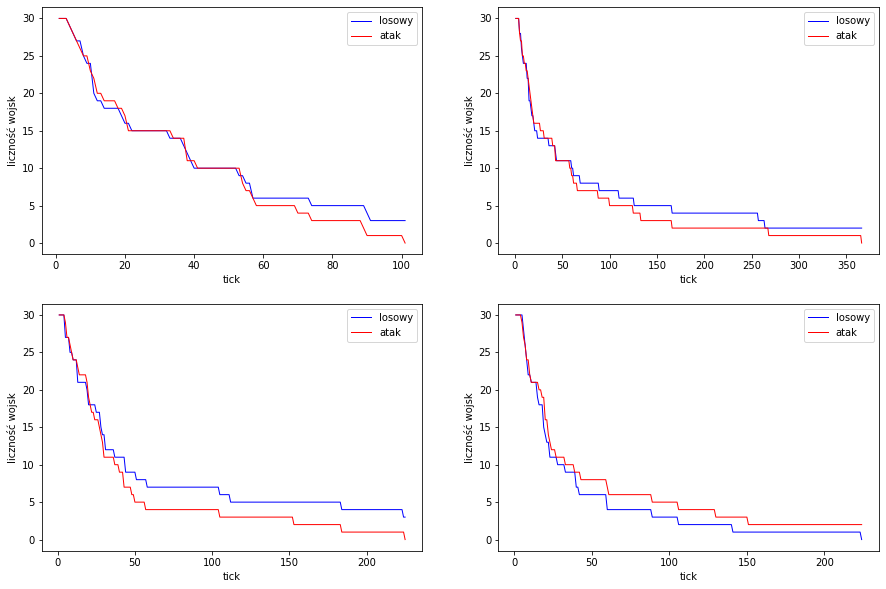

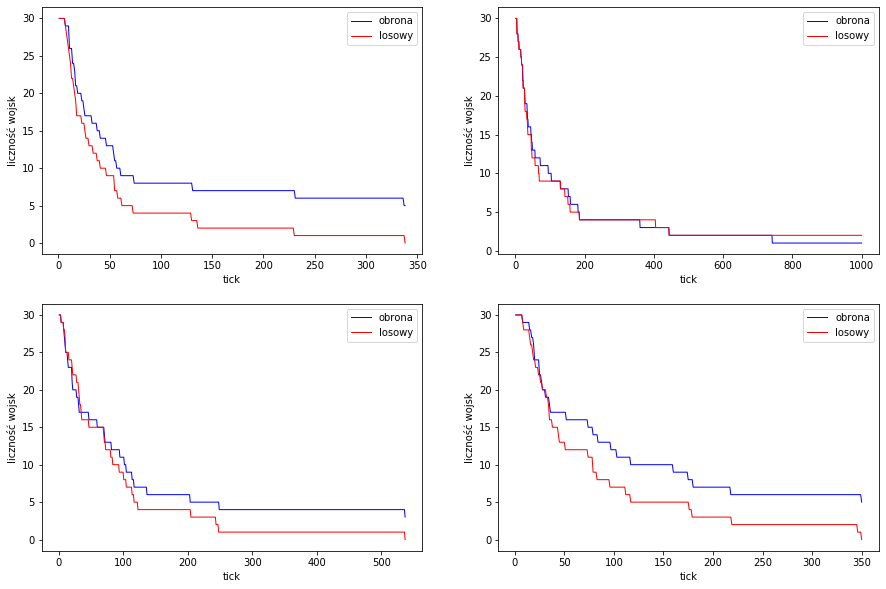

In [4]:
dirs = ['./data/2blue-vs-1red', './data/0blue-vs-1red', './data/2blue-0red']
labels = [['obrona', 'atak'], ['losowy', 'atak'], ['obrona', 'losowy']]

for directory, label in zip(dirs, labels):
    li = read_all_files(directory)
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    
    for i, l in enumerate(li):
        l['sumBlue'] = l[col_blue_names].sum(axis=1)
        l['sumRed'] = l[col_red_names].sum(axis=1)
        if i < 4:
            axs[int(i>1), i%2].plot('tick', 'sumBlue', data=l, markerfacecolor='blue', color='blue', linewidth=1, label = label[0])
            axs[int(i>1), i%2].plot('tick', 'sumRed', data=l, color='red', linewidth=1, label = label[1])
            axs[int(i>1), i%2].set_xlabel('tick')
            axs[int(i>1), i%2].set_ylabel('liczność wojsk')
            axs[int(i>1), i%2].legend()

## Porównanie liczności agentów różnego typu

In [5]:
def read_one_file(path):
    return pd.read_csv(os.path.join('.', path), index_col=None, header=0)

In [6]:
mapping = read_one_file("data/0/ModelOutput.2019.lis.17.20_08_16.batch_param_map.txt")
mapping

data = read_one_file("data/0/ModelOutput.2019.lis.17.20_08_16.txt")
data

,tick,run,remainingTanksBlue,remainingTanksRed,remainingRidersBlue,remainingRidersRed,remainingSoldiersBlue,remainingSoldiersRed
0,1.0,1,10.0,10.0,10.0,10.0,10.0,10.0
1,2.0,1,10.0,10.0,10.0,10.0,10.0,10.0
2,3.0,1,10.0,10.0,9.0,10.0,10.0,10.0
3,4.0,1,10.0,9.0,9.0,10.0,10.0,10.0
4,5.0,1,10.0,9.0,8.0,9.0,10.0,10.0
...,...,...,...,...,...,...,...,...
477136,402.0,729,0.0,0.0,1.0,1.0,0.0,0.0
477137,403.0,729,0.0,0.0,1.0,1.0,0.0,0.0
477138,404.0,729,0.0,0.0,1.0,1.0,0.0,0.0
477139,405.0,729,0.0,0.0,1.0,1.0,0.0,0.0


In [7]:
def get_specific_states(data, first=True): #if not first is last state
    if first:
        ticks = data.groupby("run")['tick'].min().values
    else:
        ticks = data.groupby("run")['tick'].max().values
    states = list()
    for i, tick in enumerate(ticks):
        row = data.loc[(data['run'] == i + 1) & (data['tick'] == tick)]
        states.append(row.values[0])
    return pd.DataFrame(data=states, columns=data.columns)

In [8]:
def determine_winner(remainingBlue, remainingRed):
    if remainingBlue > remainingRed:
        return "Blue"
    elif remainingRed > remainingBlue:
        return "Red"
    else:
        return "Draw"
    

def get_battle_summaries(first_states, last_states):
    battle_summaries = []        
    for i in range(len(last_states)):
        first_state, last_state = first_states.loc[i], last_states.loc[i]
        battle_summary = [
            last_state["tick"], #ticks
            first_state["remainingTanksBlue"], #initialTanksBlue
            first_state["remainingTanksRed"], #initialTanksRed
            first_state["remainingRidersBlue"], #initialRidersBlue
            first_state["remainingRidersRed"], #initialRidersRed
            first_state["remainingSoldiersBlue"], #initialSoldiersBlue
            first_state["remainingSoldiersRed"], #initialSoldiersRed
            last_state["remainingTanksBlue"], #remainingTanksBlue
            last_state["remainingTanksRed"], #remainingTanksRed
            last_state["remainingRidersBlue"], #remainingRidersBlue
            last_state["remainingRidersRed"], #remainingRidersRed
            last_state["remainingSoldiersBlue"], #remainingSoldiersBlue
            last_state["remainingSoldiersRed"], #remainingSoldiersRed
            last_state["remainingTanksBlue"] + last_state["remainingRidersBlue"] + last_state["remainingSoldiersBlue"], # remainingBlue
            last_state["remainingTanksRed"] + last_state["remainingRidersRed"] + last_state["remainingSoldiersRed"], # remainingRed
        ]
        battle_summary.append(determine_winner(battle_summary[-2], battle_summary[-1])) #winner
        battle_summaries.append(battle_summary)

    return pd.DataFrame(data=battle_summaries, columns=[
        "ticks",
        "initialTanksBlue",
        "initialTanksRed",
        "initialRidersBlue",
        "initialRidersRed",
        "initialSoldiersBlue",
        "initialSoldiersRed",
        "remainingTanksBlue",
        "remainingTanksRed",
        "remainingRidersBlue",
        "remainingRidersRed",
        "remainingSoldiersBlue",
        "remainingSoldiersRed",
        "remainingBlue",
        "remainingRed",
        "winner"
    ]) 

In [9]:
last_states = get_specific_states(data, False)
first_states = get_specific_states(data, True)
battle_summaries = get_battle_summaries(first_states, last_states)

In [10]:
battle_summaries.head()

,ticks,initialTanksBlue,initialTanksRed,initialRidersBlue,initialRidersRed,initialSoldiersBlue,initialSoldiersRed,remainingTanksBlue,remainingTanksRed,remainingRidersBlue,remainingRidersRed,remainingSoldiersBlue,remainingSoldiersRed,remainingBlue,remainingRed,winner
0,389.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,Blue
1,585.0,10.0,10.0,10.0,10.0,10.0,10.0,3.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,Blue
2,304.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,Blue
3,1000.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Draw
4,904.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Red


Number of completed battles: 552, number of completed battles:  177.


Text(0.5, 1.0, 'Ilość wygranych przez daną drużynę')

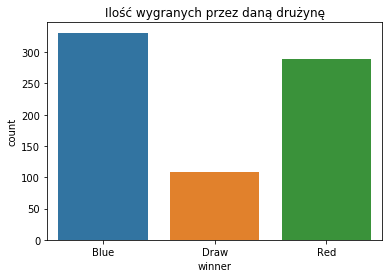

In [11]:
number_completed_battles = sum(last_states['tick'] < 1000)
number_incompleted_battles = len(last_states) - sum(last_states['tick'] < 1000)
print(f"Number of completed battles: {number_completed_battles}, number of completed battles:  {number_incompleted_battles}.")

sns.countplot(x="winner", data=battle_summaries).set_title("Ilość wygranych przez daną drużynę")

Text(0.5, 1.0, 'Rozkład ilości ruchów w danej walce')

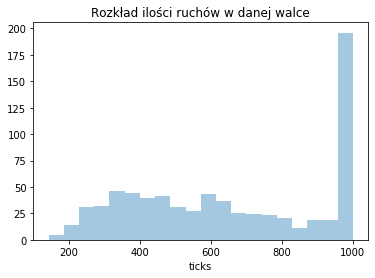

In [12]:
sns.distplot(battle_summaries['ticks'], kde=False, bins=20).set_title("Rozkład ilości ruchów w danej walce")

Text(0.5, 1.0, 'Rozkład ilości ruchów w danej walce pod odcięciu 1000 ruchów')

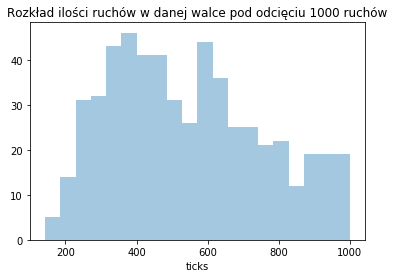

In [13]:
sns.distplot(battle_summaries[battle_summaries['ticks'] < 1000]['ticks'], kde=False, bins=20).set_title("Rozkład ilości ruchów w danej walce pod odcięciu 1000 ruchów")